In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [2]:
creditcard_df = pd.read_csv('Credit_Card.csv')
label_df = pd.read_csv('Credit_card_label.csv')
creditcard_df = pd.concat([creditcard_df, label_df], axis=1)
creditcard_df.dropna(inplace=True)
creditcard_df.dropna(axis=1, inplace=True)
creditcard_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Ind_ID,label
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,5010864,1
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,5010868,1
10,5010869,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,1,5010869,1
11,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,5018498,1
13,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,5018503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,5024049,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,-12903.0,-2924,1,0,0,0,Accountants,3,5024049,0
1542,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,1,0,1,0,Drivers,3,5118268,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,5023655,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,5115992,0


In [24]:
#Question 1
LabelEncoder = LabelEncoder()
def encoding(column):
    column = LabelEncoder.fit_transform(creditcard_df[column].values)

encoding('GENDER')
encoding('Car_Owner')
encoding('Propert_Owner')
encoding('Type_Income')
encoding('EDUCATION')
encoding('Marital_status')
encoding('Housing_type')
encoding('Type_Occupation')
creditcard_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Ind_ID,label
8,5010864,1,1,1,1,450000.0,0,3,1,1,-18173.0,-678,1,0,1,1,3,3,5010864,1
9,5010868,1,1,1,1,450000.0,1,3,1,1,-18173.0,-678,1,0,1,1,3,3,5010868,1
10,5010869,1,1,1,1,450000.0,0,3,3,1,-18173.0,-678,1,0,1,1,3,1,5010869,1
11,5018498,0,1,1,0,90000.0,3,3,1,1,-18950.0,-1002,1,1,1,0,2,2,5018498,1
13,5018503,0,1,1,0,90000.0,3,3,1,1,-18950.0,-1002,1,1,1,0,2,2,5018503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,5024049,0,1,1,1,144000.0,3,0,1,1,-12903.0,-2924,1,0,0,0,0,3,5024049,0
1542,5118268,1,1,0,1,360000.0,2,3,1,1,-11294.0,-3536,1,0,1,0,4,3,5118268,0
1544,5023655,0,0,0,0,225000.0,0,1,3,1,-10229.0,-1209,1,0,0,0,0,1,5023655,0
1545,5115992,1,1,1,2,180000.0,3,0,1,1,-13174.0,-2477,1,0,0,0,10,4,5115992,0


In [4]:
#Question 2
x = np.array(creditcard_df['Annual_income']).reshape(-1,1)
y = np.array(creditcard_df['label']).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
linreg_model = LinearRegression()
linreg_model.fit(x_train, y_train)
y_predict = linreg_model.predict(x_test)
print(linreg_model.score(x_test, y_test))

-0.0023288414568283233


In [5]:
r2_score(y_test, y_predict)

-0.0023288414568283233

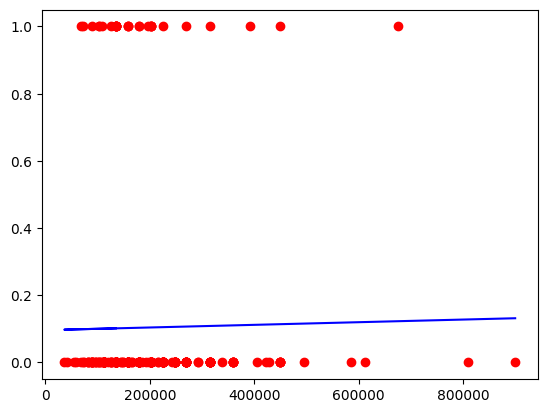

In [5]:
plt.scatter(x_test, y_test, color = 'r')
plt.plot(x_test, y_predict, color='b')

Honestly, I don't think univariate linear regression is a good model for this dataset because there are so many factors determining whether someone is accepted for a credit card or not. Annual income seemed like the best bet because it is most directly related to someone's ability to pay back the credit card, but it still isn't great because the outcome is binary.

In [6]:
#Question 3
x = creditcard_df.drop('label', axis = 1)
y = creditcard_df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)
knn = KNeighborsClassifier(n_neighbors=13) 
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)
print(y_pred)
print(type(y_pred))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
<class 'numpy.ndarray'>


In [8]:
print(knn.score(x_test, y_test))

0.8793774319066148


In [7]:
creditcard_pred_df = pd.DataFrame(x_test, columns = creditcard_df.columns[0:19])
creditcard_pred_df['Actual_Outcome'] = y_test.tolist()
creditcard_pred_df['Predicted_Outcome'] = y_pred.tolist()
creditcard_pred_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Ind_ID,Actual_Outcome,Predicted_Outcome
811,5079017,1,1,1,2,900000.0,0,0,1,1,...,-1000,1,0,0,0,10,4,5079017,0,0
552,5126527,0,0,0,0,225000.0,2,3,1,5,...,-196,1,0,1,0,11,2,5126527,0,0
688,5139761,1,1,1,0,337500.0,3,0,1,1,...,-7494,1,0,0,0,8,2,5139761,0,0
55,5052661,0,0,1,0,103500.0,3,3,1,1,...,-564,1,0,0,1,7,2,5052661,1,0
950,5036765,0,0,0,1,112500.0,3,3,1,1,...,-1224,1,0,0,1,8,3,5036765,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,5091708,0,1,1,0,135000.0,3,0,1,1,...,-3944,1,0,0,0,10,2,5091708,0,0
1184,5023209,0,0,0,1,135000.0,0,3,1,1,...,-235,1,0,0,0,14,3,5023209,0,0
1391,5112736,1,1,1,0,315000.0,3,0,1,1,...,-2796,1,0,0,0,4,2,5112736,0,0
394,5135841,0,0,1,1,36000.0,3,3,1,1,...,-1113,1,0,1,0,3,3,5135841,0,0


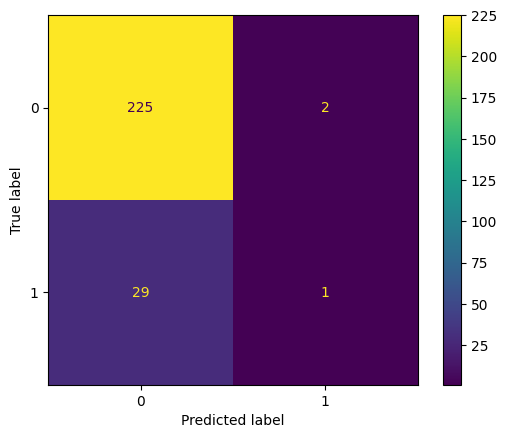

In [9]:
ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test)

This model was mostly true negatives (predicted value 0, actual value 0), so I'd say it performed pretty well. 

In [17]:
#Question 4
x = creditcard_df.drop('label', axis = 1)
y = creditcard_df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)
regression = LogisticRegression(random_state=42, max_iter=500).fit(x_train, y_train)
y_predicted = regression.predict(x_test)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
regression.score(x_test, y_test)

0.8832684824902723

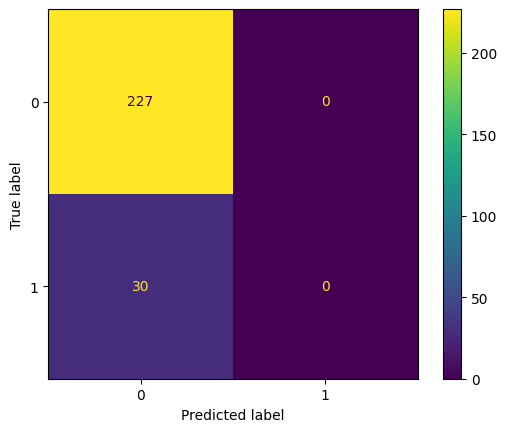

In [19]:
ConfusionMatrixDisplay.from_estimator(regression, x_test, y_test)

This model had mostly true negatives, with some false negatives and no true positives or false positives.

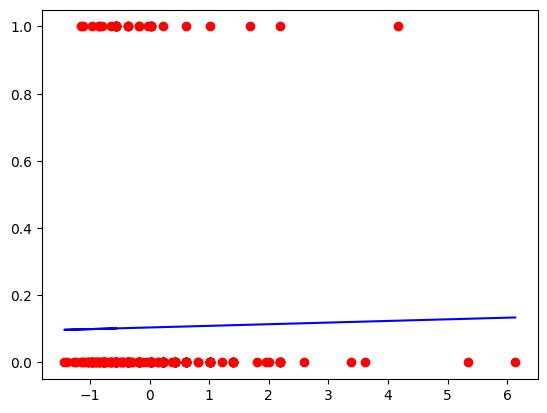

In [20]:
#Question 5
x = np.array(creditcard_df['Annual_income']).reshape(-1,1)
y = np.array(creditcard_df['label']).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
linreg_model = LinearRegression()
linreg_model.fit(x_train, y_train)
y_predict = linreg_model.predict(x_test)
plt.scatter(x_test, y_test, color = 'r')
plt.plot(x_test, y_predict, color='b')

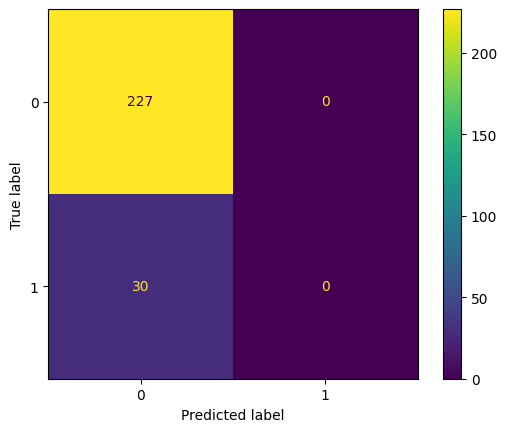

In [21]:
x = creditcard_df.drop('label', axis = 1)
y = creditcard_df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
knn = KNeighborsClassifier(n_neighbors=13) 
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)
creditcard_pred_df = pd.DataFrame(x_test, columns = creditcard_df.columns[0:19])
creditcard_pred_df['Actual_Outcome'] = y_test.tolist()
creditcard_pred_df['Predicted_Outcome'] = y_pred.tolist()
ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test)

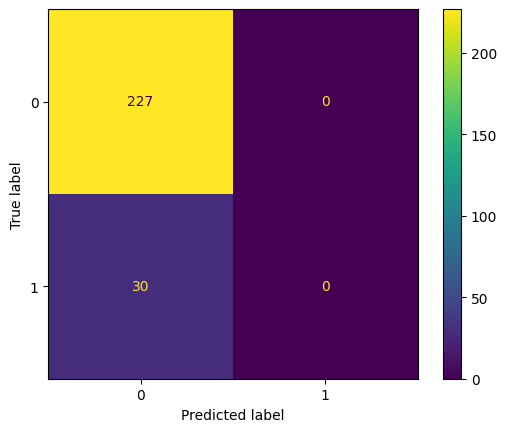

In [22]:
x = creditcard_df.drop('label', axis = 1)
y = creditcard_df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
regression = LogisticRegression(random_state=42, max_iter=500).fit(x_train, y_train)
y_predicted = regression.predict(x_test)
ConfusionMatrixDisplay.from_estimator(regression, x_test, y_test)

I don't think normalization did much in the case of this data set. For this dataset, I would use accuracy because it covers both outcomes of true positive and true negative, which is important to determine the acceptances and denials for credit cards.